# Исследование стартапов для финансовой компании

**Цель исследования:** Необходимо определить характеристики успешных стартапов, которые в перспективе будут приносить прибыль, при этом заказчик - финансовая компания, которая хотела бы выйти на инвестиционный рынок и вкладывать средства в стартапы.

**Задачи исследования:**
- изучить аномальные или странные значения, их природу возникновения
- отобразить динамику по численным показателям
- сформировать эталонный профиль стартапа, который хорошо финансируется и продается

Данные имеют некоторые особенности: как заявляет сам заказчик, они неполны, отсюда важно критически подходить к сделанным выводам и проверять данные на возможные искажения. Например, существуют сделки за 0 и 1 доллар, такие сделки необходимо дополнительно проверить.

## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации, исправление названий столбцов

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import percentileofscore
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Теперь загрузим все необходимые датасеты в переменные:

In [2]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/')

In [3]:
df_company_rounds = pd.read_csv('https://code.s3.yandex.net/')

In [4]:
df_education = pd.read_csv('https://code.s3.yandex.net/')

In [5]:
df_people = pd.read_csv('https://code.s3.yandex.net/')

In [6]:
df_degrees = pd.read_csv('https://code.s3.yandex.net/')

Посмотрим на информацию о каждом датасете, проверим, соответствуют ли заявленные данные и реальные данные, и сделаем предварительные выводы о том, какие необходимо предпринять меры для предобработки данных:

In [7]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [8]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
df_acquisition.tail()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12
9406,10529,53,92846,NaN,42600000,2013-12-12


В датасете со сделками есть несколько проблем:
- пропуски в столбце `term_code` - их природу нужно выяснить
- пропуски в столбце `acquired_at` - тут тоже важно понять, как эти пропуски появились, возможно сделка не завершена
- тип данных в столбце `acquired_at` - не тот, его нужно привести к дате

В остальных столбцах все корректно, пропусков нет, изменение названий не требуется, данные соответствуют заявленным. Всего в датасете 9407 строк и 6 столбцов.

Переходим к следующему датасету с информацией о компаниях и раундах инвестиций

In [10]:
df_company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [11]:
df_company_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_company_rounds.tail()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


В датасете с компаниями-стартапами и раундами финансирования присутствуют следующие проблемы:
- похоже есть дубль столбца `company ID` - `company id` и он имеет больше пропусков
- в каждом столбце есть пропуски (но где-то логично, что они есть, компании не закрылась или не получила финансирования) 
- названия столбцов написаны в неудобном виде
- столбцы `funded  at` `founded  at`, `closed  at ` имеют не тот тип данных, здесь уместнее будет перевести их в дату
- `is first round` и `is last round` могут быть оптимизированы до типа данных с меньшей разрядностью
- возможно еще можно было бы привести столбцы с различными id к nullable integer типу, который поддерживает работу с пропусками, но имеет целочисленный тип имеющихся данных

Всего в датасете 217 774 строки и 21 столбец. Данные соответствуют заявленному в описании - каждый раунд каждой компании отражен в таблице, что возможно не очень удобно. Далее посмотрим на следующую таблицу:

In [13]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [14]:
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [15]:
df_education.tail()

,id,person_id,instituition,graduated_at
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN
109609,109610,268528,University of San Diego School of Law,NaN


В датафрейме только одна проблема - не тот тип данных у столбца `graduated_at`, там должна быть дата. Пропуски в этом же столбце на мой взгляд не являются проблемой - скорее обусловлены природой этих данных, кто-то мог еще не закончить учебу, но более половины таких сотрудников выглядит странно, потому что не может такая большая доля сотрудников быть студентами. В датафрейме 109 610 строк и 4 столбца. Также заявленному соответствуют.

Переходим к датафрейму с информацией о сотрудниках:

In [16]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [17]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [18]:
df_people.tail()

,id,first_name,last_name,company_id,network_username
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs
226708,178190,Alex,Smith,NaN,esocialnetlike


В этом датафрейме есть пропуски в столбцах `company_id` и `network_username`. Такая большая доля пропусков в идентификаторе компании наводит на мысли об ошибке, потому что столько безработных в выборке данных не может быть. А пропуски в `network_username` могут говорить о том, что сам сотрудник не пожелал указать свой ник в соцсети. Типы данных корректны, только опять-таки, я бы поменяла тип для столбца `company_id` на nullable integer. Названия столбцов не требуют изменения, все заявленные данные в датафрейме соответствуют реальным. В нем 226 709 строк и 5 столбцов.

In [19]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [20]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [21]:
df_degrees.tail()

,id,object_id,degree_type,subject
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering
109609,109610,p:268528,J.D.,NaN


В столбцах тоже есть пропуски: `degree_type` и `subject`, но пропусков тут меньше, чем в столбце `graduated_at`, что можно было бы как раз списать на случай того, что еще человек не закончил учебное заведение, поэтому ни степени, ни предмета у него не проставлено. А так как будто нет связи и пропуски образовались не закономерно, а хаотично, что в этом датафрейме, что в том. Типы данных вроде бы в порядке, но я бы в `object_id` убрала бы букву p. в начале идентификатора и привела бы к целочисленному типу данных. Все названия столбцов написаны корректно

### Смена типов и анализ пропусков

Для начала сменим тип данных у столбца с датой сделки в датафрейме df_acquisition и посмотрим на пропуски в этом же датафрейме и попробуем объяснить причину их возникновения:

In [22]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])

Посмотрим на пропуски в `acquired_at`:

In [23]:
df_acquisition[df_acquisition['acquired_at'].isna()]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
70,92,1247,596,cash,82000000,NaT
254,326,191,5718,NaN,0,NaT
290,372,7135,7134,NaN,0,NaT
351,446,4982,5369,NaN,0,NaT
365,467,6812,8634,NaN,0,NaT
377,480,8990,2355,NaN,0,NaT
457,581,1916,11572,NaN,0,NaT
632,778,7037,14790,NaN,0,NaT
647,797,13310,15411,NaN,0,NaT
669,822,15862,7640,NaN,425000000,NaT


Каких-либо закономерностей в пропусках нет: к примеру, в сумме сделки есть как нулевые значения, так и ненулевые, то же самое с вариантами оплаты, есть как пропуски, так и значения "наличные", "за акции" и смешанного типа "акции и наличные". Поэтому пропуски в этом столбце имеют явно случайный характер (MCAR), так же и их малое количество об этом свидетельствует. Теперь рассмотрим пропуски в столбце `term_code`:

In [24]:
df_acquisition[df_acquisition['term_code'].isna()]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
5,11,227,228,NaN,7140000,2003-08-05
41,54,13171,651,NaN,90000000,2007-08-01
99,132,59,49,NaN,0,2006-10-31
100,134,1444,1409,NaN,20000000,2007-11-01
...,...,...,...,...,...,...
9398,10520,672,285961,NaN,16140200,2013-12-11
9401,10524,285984,285991,NaN,0,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03


Видно, что связи с другими столбцами здесь тоже нет: и сумма сделки вариативна, и даты как присутствуют, так и отсутствуют. Но здесь количество пропусков составляет большую часть данных и это приводит нас к выводу, что пропуски типа MNAR - они не случайны, явно что-то произошло либо в техническом плане, либо способ не мог быть указан из-за возможно другого необычного способа оплаты, но с текущим набором данных нельзя сделать конкретный вывод о причинах пропусков. 

Что же делать с пропусками в этих столбцах? Ничего, так как заменять их явно будет ошибкой - получим искажение данных и неверные выводы. А также удалять тоже не вариант, потеряем большую часть данных. Оставим как есть.

Переходим к датафоейму `df_company_rounds`. В первую очередь разберемся с названиями столбцов, приведем их к виду snake case, но при этом, пока не будем приводить к нижнему регистру первый столбец, пока не поймем, как можно его использовать и столбец дубль, но другим названием:

In [25]:
#так как между словами в названиях столбцов двойные пробелы сделаем замену в два этапа
df_company_rounds.columns = df_company_rounds.columns.str.replace(' ', '_').str.replace('__', '_')

In [26]:
df_company_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбцов изменены, теперь переходим к изменению и оптимизации типов данных:

In [27]:
#приводим к типу данных даты все соответствующие столбцы
for column in ['founded_at', 'closed_at', 'funded_at']:
    df_company_rounds[column] = pd.to_datetime(df_company_rounds[column])

In [28]:
#приводим к nullable integer столбцы с идентификаторами
for column in ['company_ID', 'company_id', 'funding_round_id']:
    df_company_rounds[column] = df_company_rounds[column].astype('Int64')

In [29]:
for column in ['is_first_round', 'is_last_round']:
    df_company_rounds[column] = pd.to_numeric(df_company_rounds[column], downcast='float')

Попробуем предположить природу пропусков. Есть предположение, что пропуски идут начиная со столбца `funding_round_id`, так как стартап не получил финансирования, а в случае со стартапами такая большая доля компаний без инвестиций очень даже выглядит реальной. И при присоединении таблиц компаний с раундами для стартапов не нашлось значений и поэтому получили NaN и как раз дубль company_id. Посмотрим, есть такие строки, где есть пропуски в дате инвестирования, но нет пропуска в сумме инвестирования:

In [30]:
df_company_rounds[(df_company_rounds['funded_at'].isna())&(~df_company_rounds['raised_amount'].isna())]['raised_amount'].value_counts()

raised_amount
0.0           137
1000000.0      13
500000.0        6
10000000.0      4
50000.0         4
             ... 
220000.0        1
235800.0        1
275000.0        1
41386.0         1
4500000.0       1
Name: count, Length: 65, dtype: int64

In [31]:
df_company_rounds[(df_company_rounds['funded_at'].isna())&(~df_company_rounds['raised_amount'].isna())]

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
38,10021,Diditz,network_hosting,operating,2008-01-01,NaT,diditz.com,NaN,IND,0.0,...,0.0,3256,10021,NaT,angel,0.0,0.0,1.0,0.0,0.0
351,10194,BragThis.com,games_video,closed,2008-06-23,2012-05-12,bragthis.com,NaN,USA,0.0,...,0.0,3291,10194,NaT,venture,0.0,0.0,0.0,0.0,0.0
822,10407,Linkua,games_video,closed,2007-02-07,2013-08-21,linkua.com,NaN,ESP,0.0,...,0.0,3340,10407,NaT,angel,0.0,0.0,0.0,0.0,0.0
894,10427,RentBureau,web,acquired,2006-05-15,NaT,rentbureau.com,NaN,USA,0.0,...,0.0,3341,10427,NaT,series-a,0.0,0.0,0.0,0.0,0.0
1635,10684,Gruvie,network_hosting,closed,2007-01-01,2012-09-08,gruvie.com,NaN,USA,0.0,...,0.0,3390,10684,NaT,angel,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217408,6632,Leaders2020,web,closed,2007-09-01,2008-06-09,apps.socialnet.com::office-book,NaN,USA,0.0,...,0.0,2595,6632,NaT,angel,0.0,0.0,0.0,0.0,0.0
217539,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,1582,2489,NaT,angel,0.0,0.0,0.0,0.0,0.0
217600,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,7664,28048,NaT,series-a,5895000.0,0.0,0.0,0.0,0.0
217601,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,7678,28104,NaT,venture,4500000.0,0.0,0.0,0.0,0.0


Большинство строк без пропусков все равно содержит данные в виде нуля, что означает, что стартап также не получил финансирования. Поэтому частично гипотеза подтверждается, но 111 строк все равно имеют сумму финансирования и пропуск в дате, но при этом другие данные по финансированию имеют. Как раз это тоже сходится с количеством ненулевых значений - в `funded_at` 52 680 значений, а в других столбцах о финансировании и раундах 52 928 строк - разница наши искомые 248 строк, просто с пропуском в `funded_at`. Предварительно можем сказать, что такое большое количество пропусков в столбцах о раундах обусловлено тем, что стартап не получил денег. Тогда пропуски отражают природу данных, их не надо заполнять.

Переходим к датафрейму `df_education`, в нем нужно только исправить тип данных у столбца `graduated_at`:

In [32]:
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])

Что касается пропусков в этих датафреймах, то их заполнять тоже не имеет смысла, так как данные не числовые и тоже можно исказить природу данных. Даты выпуска, идентификатор компании - такие данные, что нельзя заполнить, ориентируясь на какие-то групповые признаки, здесь важна точность этих данных.

### Промежуточные выводы

В ходе предварительной предобработки были изменены и оптимизированы типы данных, подробнее рассмотрены причины пропусков. Пропуски не были заполнены, так как заполнение исказит и природу данных (тем более как раз один из вопросов исследования посвящен тому, где наиболее полные данные о сотрудниках и зависит ли это от некоторых факторов), и итоговые выводы. Итого имеем:
- 9407 строк с данными о сделках и продажах 
- 58 928 строк с данными о компаниях и их раундах финансирования, где полно отражены данные именно о раундах с выделенными деньгами (с поправкой на то, что встречаются и 0)
- 34 615 человек с указанным местом работы, именно такое количество данных, которые могут быть полезны при исследовании, остальные люди в выборке без указания место работы не особо несут информацию
- 58 054 строк с полными данными об образовании с годом выпуска и образовательным учереждением
- 81 298 строк с полными данными о степенях и специализациях людей

Этих данных вполне достаточно для дальнейшего анализа, а также наличие пропусков тоже поможет нам выявить некоторые закономерности в отношении полноты данных и от чего она итогово зависит.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам
Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указано:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

В таблице оставим информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [33]:
#вычислим здесь медиану, чтобы избежать смещения типичного значения в сторону выброса
grouped_by_year =( 
    df_company_rounds.groupby(df_company_rounds['funded_at'].dt.year)['raised_amount']
    .agg({'median', 'count'})
    .reset_index()
)

In [34]:
grouped_by_year['funded_at'] = grouped_by_year['funded_at'].astype('int64')

In [35]:
grouped_by_year = grouped_by_year[grouped_by_year['count'] > 50]

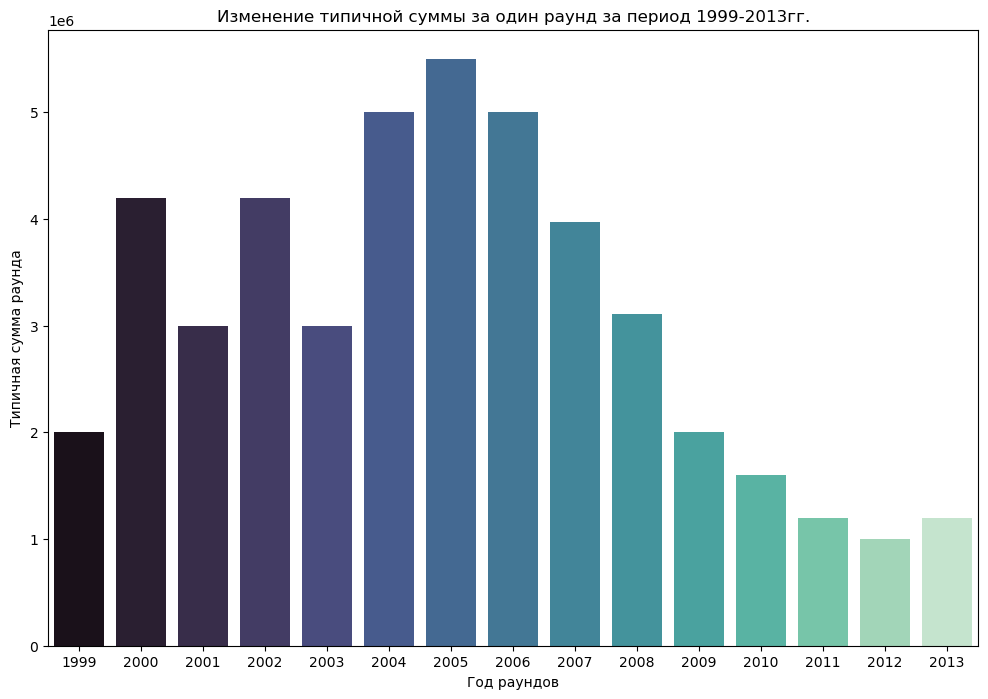

In [36]:
plt.figure(figsize=(12, 8))


sns.barplot(
    data = grouped_by_year,
    x='funded_at',
    y='median',
    palette='mako',
    ci=None
)

plt.title('Изменение типичной суммы за один раунд за период 1999-2013гг.')
plt.ylabel('Типичная сумма раунда')
plt.xlabel('Год раундов')
plt.show()

In [37]:
display(grouped_by_year)

,funded_at,count,median
15,1999,76,2000000.0
16,2000,125,4200000.0
17,2001,96,3000000.0
18,2002,116,4200000.0
19,2003,159,3000000.0
20,2004,291,5000000.0
21,2005,1633,5500000.0
22,2006,2436,5000000.0
23,2007,3279,3973320.0
24,2008,3774,3110000.0


На графике видно, что самый большой типичный размер инвестиций в рамках одного раунда зафиксирован в 2005 году - 5,5 млн. А далее видно, как размер инвестиций в рамках одного раунда стал сокращаться, тут скорее и общее экономическое положение в мире сыграло роль - в 2008 году был кризис, и люди стали более диверсифицировано подходить к инвестициям в стартапы - те же 5 млн распределить по 1-1,2 млн в несколько компаний. По увеличению раундов это также заметно. Общая тенденция - раундов и компаний, в которые вкладывались больше, но сам размер инвестиций меньше.

В общем-то эта тенденция пошла еще с 2011 года, но по количеству раундов 2013 год явно больше всех предыдущих лет. Возможно это связано и с тем, что больше компаний открывалось с 2011 года, а в 2013 достигло своего определенного пика и отсюда тоже возможна гипотеза, что при разнообразии и большом количестве компаний люди разделяли капитал между несколькими компаниями. Посмотрим на количество основанных компаний по годам:

In [38]:
grouped_by_founded_year =( 
    df_company_rounds.groupby(df_company_rounds['founded_at'].dt.year)['company_ID']
    .agg({'count'})
    .reset_index()
)

In [39]:
grouped_by_founded_year = grouped_by_founded_year[grouped_by_founded_year['founded_at'] > 1998]

In [40]:
grouped_by_founded_year['founded_at'] = grouped_by_founded_year['founded_at'].astype('int64')

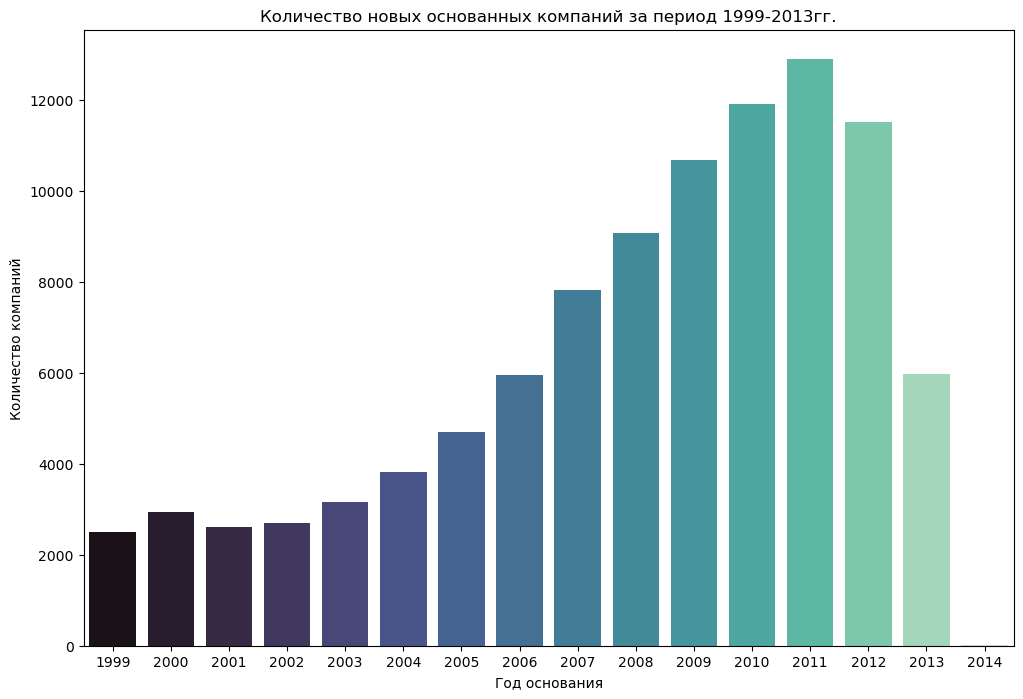

In [41]:
plt.figure(figsize=(12, 8))


sns.barplot(
    data = grouped_by_founded_year,
    x='founded_at',
    y='count',
    palette='mako',
    ci=None
)

plt.title('Количество новых основанных компаний за период 1999-2013гг.')
plt.ylabel('Количество компаний')
plt.xlabel('Год основания')
plt.show()

И правда, увеличение раундов можно связать с увеличением основанных компаний и необходимостью перераспределять бюджет в целях как минимум диверсификации.


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Для начала соединим два датасета `df_people` `df_education`

In [42]:
employer_data = df_people.merge(df_education, how='left', left_on='id', right_on='person_id', suffixes=('_employer', '_note'))

Посмотрим на получившийся датасет:

In [43]:
employer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_employer       267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_note           109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.4+ MB


В данных оказалось больше строк, чем изначально - имеет смысл проверить его на дубликаты по столбцу `id_employer`. Также видно, что изменился тип данных у столбцов `id_note` `person_id` - из-за того, что в таблице образовались пропуски, не для всех людей из датасета есть информация об образовании. Посмотрим на дубликаты в `id_employer`:

In [44]:
employer_data['id_employer'].duplicated().sum()

40986

И правда, если избавиться от этих 40 986 дубликатов, мы получим итоговую таблицу с изначальным количеством строк датасета `df_people`(ну почти, окажется в итоговом датасете 226 708 строк вместо 226 709). Удалим дубликаты:

In [45]:
employer_data = employer_data.drop_duplicates(subset='id_employer')

Также я бы удалила ненужные столбцы `person_id`(по факту дубль `id_employer`) и `id_note`(столбец, не несущий никакой информации для исследования):

In [46]:
employer_data = employer_data.drop(columns=['id_note', 'person_id'])

Для присоединения таблицы `df_degrees` еще необходимо дополнительно преобразовать данные столбца `object_id`, убрать буквенное значение и изменить тип данных:

In [47]:
df_degrees['object_id'] = df_degrees['object_id'].str.replace('p:', '').astype('int64')

Теперь можно присоединять этот датасет к итоговому датасету со всеми данными по сотрудникам:

In [48]:
employer_data = employer_data.merge(df_degrees, how='left', left_on='id_employer', right_on='object_id')

In [49]:
employer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267693 entries, 0 to 267692
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_employer       267693 non-null  int64         
 1   first_name        267684 non-null  object        
 2   last_name         267689 non-null  object        
 3   company_id        44788 non-null   float64       
 4   network_username  50775 non-null   object        
 5   instituition      109006 non-null  object        
 6   graduated_at      58783 non-null   datetime64[ns]
 7   id                109056 non-null  float64       
 8   object_id         109056 non-null  float64       
 9   degree_type       97883 non-null   object        
 10  subject           80890 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 22.5+ MB


In [50]:
employer_data['id_employer'].duplicated().sum()

40985

Опять-таки изменились типы данных и появились дубликаты, нужно от них избавиться:

In [51]:
employer_data = employer_data.drop_duplicates(subset='id_employer')

#дополнительно уберем столбец id
employer_data = employer_data.drop(columns='id')

После всех объединений можно переходить к подсчету сотрудников в компаниях и их категоризации по числу сотрудников.

In [52]:
grouped_employer_data = employer_data.groupby('company_id', as_index=False)['id_employer'].agg('count')

Теперь посмотрим, какие вообще встречаются компании по численности:

In [53]:
grouped_employer_data['id_employer'].describe(percentiles=[.8, .9, .95, .99])

count    22921.000000
mean         1.510144
std          2.764379
min          1.000000
50%          1.000000
80%          2.000000
90%          2.000000
95%          4.000000
99%          8.000000
max        244.000000
Name: id_employer, dtype: float64

Данные имеют низкую вариативность, в компаниях как будто бы очень мало человек, также встречается выброс в 244 человека. Отсюда следует поделить компании на следующие группы: 
- 1 человек в компании
- более 1
- более 2
- более 10

Да, большинство компаний так будут в группе 1 и более 1 и возможно категориальных данных тогда недостаточно для формирования каких-либо рекомендаций. Приступим к категоризации с помощью метода `cut()`:

In [54]:
grouped_employer_data['company_category'] = pd.cut(grouped_employer_data['id_employer'], 
                                                   bins=[0, 1, 2, 3, 245], 
                                                   labels=['1 человек', 'более 1', 'более 2', 'более 10'])

Далее присоединим этот датафрейм с категоризацией к датафрейму с данными о людях и подсчитаем как раз долю пропусков в различных столбцах, сгруппировав по размеру компании:

In [55]:
employer_data = employer_data.merge(grouped_employer_data, how='left', on='company_id', suffixes=('_1','_2'))

In [56]:
final_employer_data = (
    employer_data.groupby('company_category', as_index=False)
    [['network_username', 'instituition', 'graduated_at', 'degree_type', 'subject']]
    .agg(lambda x: x.isnull().mean())
)

In [57]:
final_employer_data

,company_category,network_username,instituition,graduated_at,degree_type,subject
0,1 человек,0.414551,0.463127,0.572201,0.514738,0.549017
1,более 1,0.506091,0.466962,0.597268,0.523810,0.559985
2,более 2,0.575823,0.487875,0.636989,0.540717,0.581252
3,более 10,0.656246,0.469400,0.665144,0.524468,0.585548


По полученным данным видно, что ник в социальных сетях в компаниях с большим количеством сотрудников указывают реже - если речь идет об аккаунте личной страницы, то не все хотят указывать личную информацию и оставлять ее открытой для коллег, а если же речь о рабочей странице компании, в которой работает человек, то возможно забывают указать ник компании.

По дате выпуска тоже есть значимые различия - по убыванию с увеличением числа сотрудников уменьшается и указание даты выпуска из образовательного учереждения. Тоже возможно как часть частной жизни, которую сотрудники не хотят указывать, так как по ней можно определить и возможный возраст.

По остальным же столбцам значимых различий как будто бы нет.

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установиь, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Итогово оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Для этого сначала преобразуем нужные столбцы в множества и найдем их пересечения:

In [58]:
set_company = set(df_company_rounds['network_username'])
set_people = set(df_people['network_username'])

intersection = len(set_company & set_people)

print(intersection)

2200


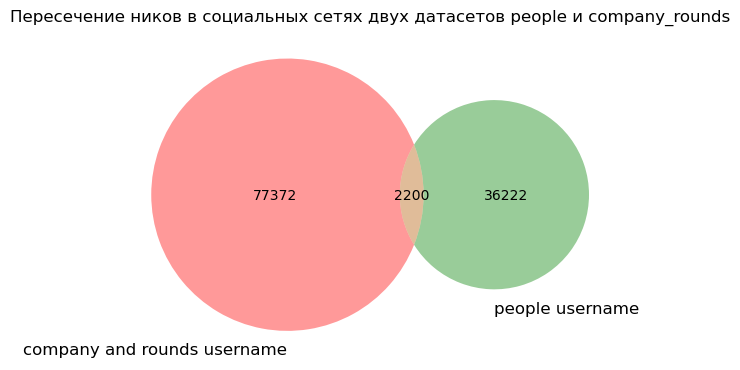

In [59]:
venn2([set_company, set_people], set_labels=('company and rounds username', 'people username'))

plt.title('Пересечение ников в социальных сетях двух датасетов people и company_rounds')
plt.show()    

Всего 2200 пересечений, при присоединении этих таблиц по столбцу `network_username` мы потеряем много данных. Для сравнения посчитаем то же самое для столбцов `company_id`:

In [60]:
set_company_2 = set(df_company_rounds['company_ID'])
set_people_2 = set(df_people['company_id'])

intersection_2 = len(set_company_2 & set_people_2)

print(intersection_2)

22922


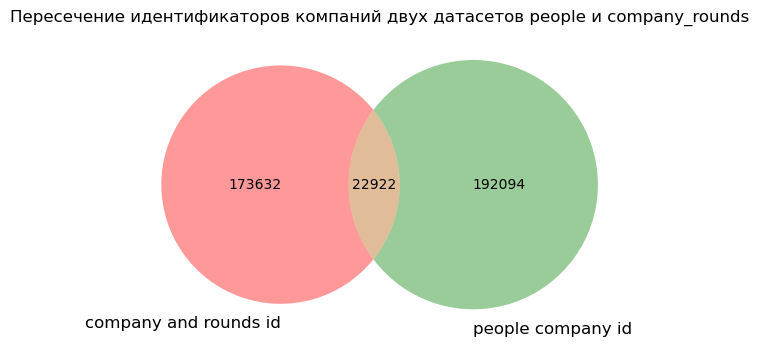

In [61]:
venn2([set_company_2, set_people_2], set_labels=('company and rounds id', 'people company id'))

plt.title('Пересечение идентификаторов компаний двух датасетов people и company_rounds')
plt.show()  

То есть пересечений больше в 10 раз, чем мы бы объединяли по `network_username`. Поэтому итогово можно сказать, что объединять по этому столбцу нельзя.


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний без дополнительных или промежуточных агрегаций.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом. Предлагаю разделить таблицы, чтобы не дублировать информацию по компании, а раунды рассматривать отдельно:

In [62]:
df_company = df_company_rounds[['company_ID', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]

In [63]:
df_rounds = df_company_rounds[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round']]

После разъединения таблицы имеют некоторые проблемы: по компаниям явно будут дубли, их надо удалить, еще у столбца с идентификатором компании неудобное название, исправим это:

In [64]:
df_company.duplicated().sum()

21220

In [65]:
df_company = df_company.drop_duplicates()

In [66]:
df_company.columns = df_company.columns.str.lower()

Переходим к таблице с раундами финансирования

In [67]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  Int64         
 1   raised_amount        52928 non-null  float64       
 2   funding_round_id     52928 non-null  Int64         
 3   funded_at            52680 non-null  datetime64[ns]
 4   funding_round_type   52928 non-null  object        
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float32       
 8   is_last_round        52928 non-null  float32       
dtypes: Int64(2), datetime64[ns](1), float32(2), float64(3), object(1)
memory usage: 13.7+ MB


Видно, что в датасете осталось очень много пустых строк, которые тоже необходимо удалить, посмотрим на эти строки:

In [68]:
display(df_rounds[df_rounds['funding_round_type'].isna()].head(20))

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round
3,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
4,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
5,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
6,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
7,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
8,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
9,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
10,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
11,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN
12,<NA>,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN


In [69]:
df_rounds = df_rounds.dropna(how='all')


## Исследовательский анализ объединённых таблиц


### Объединение данных
Заказчика интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверим полноту и корректность получившейся таблицы. Далее будем работать только с этими данными.

In [70]:
df = df_company[(df_company['status'] == 'acquired') | ((df_company['funding_rounds'] > 0) | (df_company['investment_rounds'] > 0))]

Что же теперь с пропусками в таблице? Посмотрим и попробуем предположить, почему они могут быть в таблице:

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: Int64(1), datetime64[ns](2), float64(4), object(6)
memory usag

In [72]:
len(df[(df['category_code'].isna()) & (df['milestones'] < 1) & (df['funding_total'] < 1)])

3382

In [73]:
df[df['network_username'].isna()].groupby(df['founded_at'].dt.year)['company_id'].agg('count').sort_values(ascending=False)

founded_at
2007.0    766
2006.0    681
2008.0    612
2011.0    600
2005.0    546
         ... 
1953.0      1
1956.0      1
1957.0      1
1958.0      1
1903.0      1
Name: company_id, Length: 93, dtype: Int64

Есть столбцы, в которых все также присутствуют пропуски:
- для `closed_at` мы уже определяли природу пропусков, просто остальные компании еще не закрылись
- в столбце `category_code` очень слабо проверена зависимость, что большинство строк с пропусками там не имеют вехи финансирования и суммы финансирования (3382 строки)
- большинство пропусков в `network_username` идут после 2005 года, что достаточно странно, потому что логичнее было бы увидеть пропуски у компаний основанных раньше, скорее всего относительно новые компани не создали себе еще аккаунты
- в столбце `domain` возможны пропуски из-за того, что у стартапа нет сайта
- в столбцах `founded_at` и `country_code` пропуски вероятно тоже случайного характера, ошибка заполнения данных по компаниям

Тем не менее ключевых данных для ответа на вопросы исследования хватает.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

In [74]:
df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

По предварительной оценке можно точно сказать, что с такой величиной данных (исчисление в миллионах) тяжело работать. Имеет смысл создать еще один столбец с суммой финансирования в миллионах и далее по нему уже опять сделать `describe()`:

In [75]:
df['funding_total_in_mln'] = round(df['funding_total'] / 1000000, 2)

In [76]:
df['funding_total_in_mln'].describe(percentiles=[.99, .95, .8])

count    40747.000000
mean        10.135590
std         56.464353
min          0.000000
50%          0.600000
80%          8.750000
95%         43.500000
99%        133.946200
max       5700.000000
Name: funding_total_in_mln, dtype: float64

Видно, что в данных явно есть выбросы (нулевые суммы сюда тоже входят), что повлияло на среднее значение и медиана отличается от него почти в 17 раз. Какой-то стартап был продан аж за 5,7 млрд, что конечно же и является тем самым выбросом. Скорее всего на данных по финансированию стартапов может быть не совсем уместно классическим способом оценивать типичную сумму финансирования, так как стартапы бывают разные, со своей спецификой и успешностью. 

Отфильтруем датасет от выбросов в этом столбце для построения корректного "ящика с усами":

In [77]:
df_boxplot = df[
    (df['funding_total_in_mln'] < df['funding_total_in_mln'].quantile(0.8)) & 
    (df['funding_total_in_mln'] > 0)
]

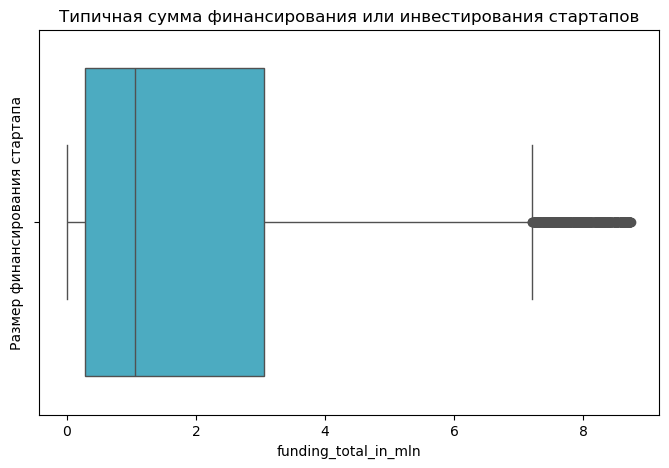

In [99]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_boxplot['funding_total_in_mln'], color='#39b7d4')

plt.title('Типичная сумма финансирования или инвестирования стартапов')
plt.ylabel('Размер финансирования стартапа')
plt.show()

Видно, что даже при условии, что мы отфильтровали нулевые суммы и выбросы дальше 80ого перцентиля, распределение данных все равно скошенно вправо, медиана больше приближена к 25ому перцентилю. Также правый ус длиннее, чем левый, что свидетельствует о скошенности данных вправо.


### Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [79]:
null_price = df_acquisition.merge(df, how='left', left_on='acquired_company_id', right_on='company_id')

In [80]:
null_price = null_price[
    ((null_price['price_amount'] == 0)|(null_price['price_amount'] == 1))&
    (null_price['funding_total'] > 0)
]

Возможно это компании, которые часто банкротятся, привлекают деньги, а далее просто не приносят прибыли и как стартап закрываются или поглощаются другими компаниями, более крупными.

Посмотрим, какие категории представляют эти компании и в каком количестве, а также как раз можем посмотреть на компании-покупатели этих компаний, возможно это поглощение более сильными компаниями на рынке, когда молодая компания-стартап уже в плачевном состоянии и ни за какие деньги ее не приобретают, но факт принадлежности другой компании отразить в данных необходимо.

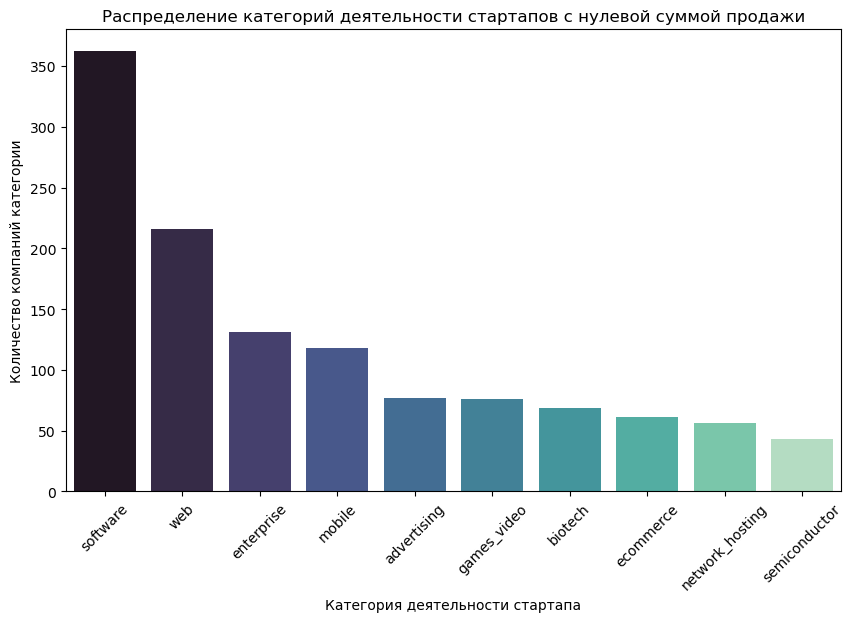

In [81]:
top_10_category = null_price.groupby('category_code')['company_id'].agg('count').sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_category,
    x='category_code',
    y='company_id',
    palette='mako'
)

plt.title('Распределение категорий деятельности стартапов с нулевой суммой продажи')
plt.xlabel('Категория деятельности стартапа')
plt.ylabel('Количество компаний категории')
plt.xticks(rotation=45)
#ax.bar_label(ax.containers[0])
plt.show()

Больше всего компаний в двух категориях - "software" и "web" - скорее всего из-за дороговизны технологий такие стратапы и банкротятся. Теперь посмотрим на компании, которые покупают другие стартапы:

In [82]:
null_price.groupby('acquiring_company_id')['id'].agg('count').sort_values(ascending=False).describe()

count    1130.000000
mean        1.431858
std         1.816481
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        28.000000
Name: id, dtype: float64

In [83]:
top_10_acquiring = null_price.groupby('acquiring_company_id')['id'].agg('count').sort_values(ascending=False).head(10).reset_index()
top_10_acquiring = top_10_acquiring.merge(df, how='left', left_on='acquiring_company_id', right_on='company_id')
top_10_acquiring = top_10_acquiring[['name', 'id']].rename(columns={'id': 'aquired_companies'})
display(top_10_acquiring)

,name,aquired_companies
0,Google,28
1,IBM,26
2,Oracle Corporation,21
3,Microsoft,18
4,Yahoo!,15
5,Cisco,14
6,Dell,14
7,Groupon,13
8,EMC,10
9,Socialnet,9


1130 компаний по факту участвовали в возможных поглощениях компаний, больше всего (выведен топ-10 компаний) покупали разные компании цифровые гиганты по типу Google, IBM, Oracle и Microsoft. Но прям какой-то компании, которая выкупила или поглотила массово стартапы, нет.

Далее рассчитаем верхнюю и нижнюю границу выбросов для столбца `funding_total` и определим для них процентили:

In [84]:
#расчет межквартиельного размаха
q1 = df['funding_total_in_mln'].quantile(0.25)
q3 = df['funding_total_in_mln'].quantile(0.75)
iqr = q3 - q1

#расчет границ выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#определение перцентиля значений границ выбросов
lower_percentile = percentileofscore(df['funding_total_in_mln'], lower_bound, kind='rank')
upper_percentile = percentileofscore(df['funding_total_in_mln'], upper_bound, kind='rank')

print(f'Нижняя граница выбросов {lower_bound: .2f}, что соответствует {lower_percentile: .2f}-ому перцентилю')
print(f'Верхняя граница выбросов {upper_bound: .2f}, что соответствует {upper_percentile: .2f}-ому перцентилю')
print('\n')
print(df['funding_total_in_mln'].quantile(0.00))
print(df['funding_total_in_mln'].quantile(0.31))
print(df['funding_total_in_mln'].quantile(0.32))

Нижняя граница выбросов -8.48, что соответствует  0.00-ому перцентилю
Верхняя граница выбросов  14.13, что соответствует  85.62-ому перцентилю


0.0
0.0
0.01


Видно, что нижняя граница диапазона выбросов ушла в минус - таких значений в наборе данных у нас нет да и нетипично сумму покупки считать в минусовых значениях, отсюда будем брать нижнюю границу за ноль и это тоже будет нулевой перцентиль, более того, это будет диапазон с нулевого до 31ого перцентиля, так как таких нулевых значений у нас много.


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- наибольшим разбросом цен за стартап.

Посмотрим на эти данные в разрезе как раз категорий деятельности, чтобы определить, в какие сферы следует вкладываться при различных целях инвестирования.

In [85]:
category_stat = df[df['status'] == 'acquired']
category_stat = (
    category_stat.groupby('category_code')['funding_total_in_mln']
    .agg(['median', 'std', 'count'])
    .reset_index())

category_stat = category_stat[category_stat['count'] > 10]

После формирования датафрейма с категориями и их показателями, сформируем два топа категорий в зависимости от столбца сортировки:

In [86]:
top_median = category_stat.sort_values(by='median', ascending=False).head(5)

In [87]:
top_std = category_stat.sort_values(by='std', ascending=False).head(5)

In [88]:
display(top_median)

,category_code,median,std,count
19,medical,19.02,17.914033,16
28,photo_video,2.90,16.214040,12
1,analytics,2.77,16.651760,39
34,social,1.90,13.539238,27
14,health,1.83,61.055535,27


По данному топу можно сделать следующие выводы:
- medical - скорее всего стартапы такой стоимости имеют массовое применение и внедрение, так как в перспективе могут принести еще большое количество денег, но разброс цен здесь невысокий
- photo_video - идет далее на втором месте, тоже с небольшим разбросом цен, но по медиане сразу видно падение, стартапы уже этой категории стоят в районе 3 миллионов долларов
- не далеко от предыдущей категории analytics, медианная стоимость не многим меньше, разброс цен примерно такой же, но купленных компаний больше
- на 4ом и 5ом местах social и health, стоимость этих стартапов не достигает 2 миллионов долларов, разброс цен social не велик, а вот health уже имеет большую вариацию цен

In [89]:
display(top_std)

,category_code,median,std,count
21,mobile,0.00,280.845027,416
4,cleantech,0.00,116.552097,115
14,health,1.83,61.055535,27
3,biotech,0.00,35.751403,455
11,finance,0.00,32.493238,40


По данному топу можно сделать следующие выводы:
- mobile имеет очень большой разброс цен, при этом медиана у него равна нулю, что сигнализирует нам о том, что малое количество стартапов получает хоть какое-то финансирование, так что это категория повышенного риска
- cleantech может быть охарактеризовано также, как и mobile, очень рисковая категория для инвестирования
- health оказалась и в этом топе категорий, что говорить о том, что и цена типичного стартапа высока, и разброс цен большой, но в эту категорию можно хотя бы инвестировать более спокойно
- на 4ом и 5ом местах biotech и finance - здесь тоже видно, что медианная цена равна нулю, что сигнализирует о малой выкупаемости таких стартапов


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа. Исследуем значения столбца.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [90]:
before_acquired = df[df['funding_rounds'] > 0]

before_acquired = before_acquired.groupby('status')['funding_rounds'].agg('mean').sort_values(ascending=False).reset_index()

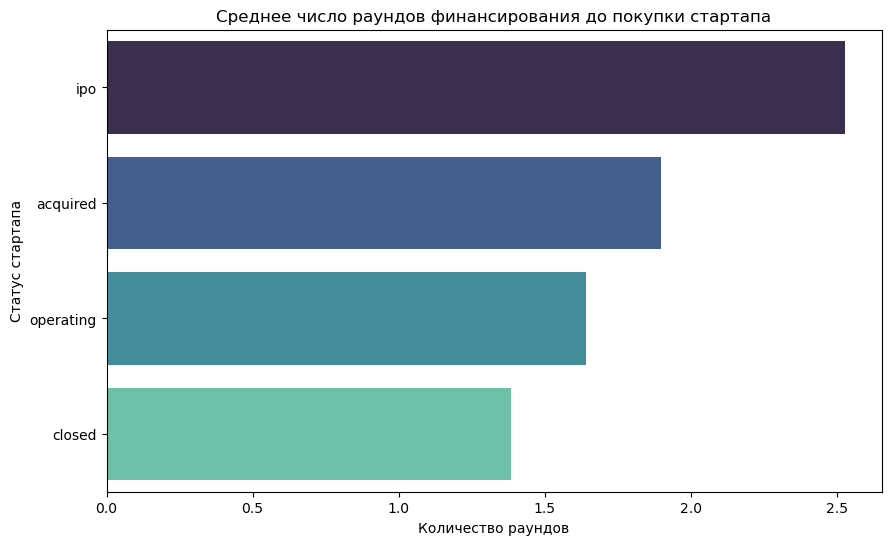

In [91]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data = before_acquired,
    x='funding_rounds',
    y='status',
    palette='mako'
)

#for container in ax.containers:
    #ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Среднее число раундов финансирования до покупки стартапа')
plt.xlabel('Количество раундов')
plt.ylabel('Статус стартапа')
plt.show()

[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]


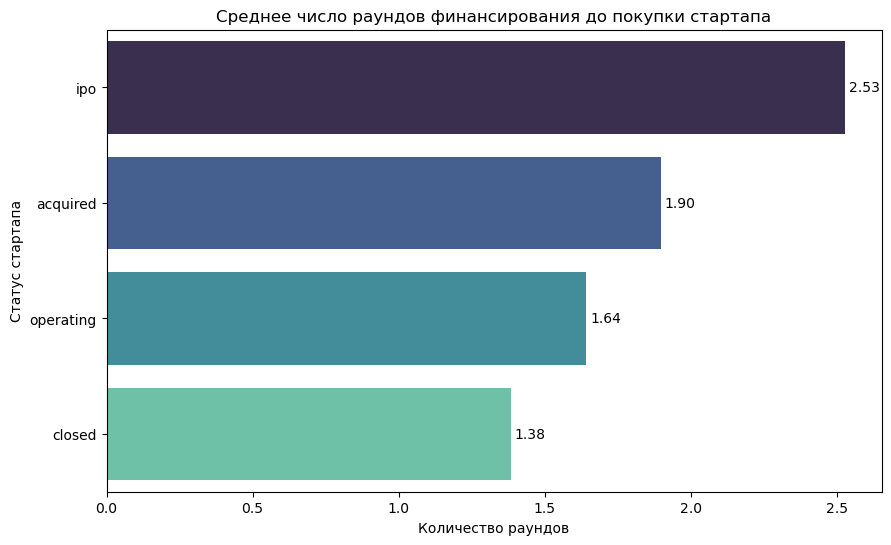

In [92]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=before_acquired,
    x='funding_rounds',
    y='status',
    palette='mako',
    orient='h'  # явное указание горизонтальной ориентации
)

# Попробуй сначала проверить, есть ли контейнеры вообще
print(ax.containers)

# Затем уже добавляй подписи
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Среднее число раундов финансирования до покупки стартапа')
plt.xlabel('Количество раундов')
plt.ylabel('Статус стартапа')
plt.show()


По данной визуализации видно, что чем больше раундов финансирования у стартапа, тем лучше его статус. Выход на IPO - это достаточно долгий и дорогостоящий процесс, который в общем-то является показателем устойчивости компании. Ну и что тоже закономерно, чем больше у компании раундов финансирования, тем вероятнее она сможет позволить себе IPO.


## Итоговый вывод и рекомендации



### Что было сделано:

Перед исследованием данных была проведена предобработка. В ходе предварительной обработки были проделаны следующие действия:
- изменены типы данных у столбцов, которые этого требовали, в основном это были даты, но также и был применен тип nullable integer для корректной работы с идентификаторами
- приведены к snake case названия столбцов в датафрейме company_and_rounds для дальнейшей работы с ними
- проанализированы пропуски в столбцах, сделаны предположения о природе их возникновения, какие-то пропуски были получены в ходе присоединения и выгрузки датасетов, большинство пропусков случайны (MCAR), но есть пропуски, на которые следует обратить внимание - пропуски в столбце `term_code`, явно не учтена специфика расчетов для стартапов (или другая причина)
- оценена полнота данных о сотрудниках в зависимости от размера компании - как таковых значимых различий найдено не было, только если в указании никак в социальных сетях и года окончания учебного заведения, в малых компаниях пропусков по этим столбцам было меньше, что опять-таки кажется странным для мелких компаний, где с хранением данных для сотрудников все обстоит не так хорошо, как в корпорациях
- проверена возможность соединения таблиц по столбцу `network_username`, отказ от объединения по этому столбцу
- формирование двух датасетов из датасета `company_and_rounds` для более удобного дальнейшего анализа
- оценена полнота данных в итоговом датасете с заданными заказчиком требованиями

В итоговом датасете получилось 40 747 строк и 13 столбцов, с чем далее и был проведен исследовательский анализи данных и сформированы итоговые выводы.

### Выводы

- В 2005 году был зафиксирован самый большой типичный размер раунда финансирования, далее этот показатель пошел на спад. Что можно связать и с макроэкономической ситуацией в мире, и с увеличением количества стартапов, что потребовало диверсификации и более разнообразных вложений от инвесторов.
- При этом количество стартапов начало расти как раз с 2005 года, в 2011 году был зафиксирован пик по количеству стартапов, а далее в 2013 году снижение почти в 1,5 раза. По 2014 году видимо еще нет полных данных, отсюда и малое количество открытых стартапов в этом году.
- По стоиомсти стартапов наблюдаются значительные выбросы, что говорит о том, что инвестирование в стартапы имеет высокую степень риска, а также различная специфика и потенциал того или иного стартапа как раз и не дают вынести однозначного ответа по поводу типичности стоимости компании. В каждом отдельном случае нужно смотреть на потенциал и досконально анализировать.
- Есть компании-гиганты, которые позволяют себе не единично выкупать или поглощать стартапы, это в основном Google, IBM, Oracle, Cisco, Yahoo, Microsoft, но какого-то монополиста, который массово скупает стартапы, нет, консолидации рынка инвестирования также нет.
- Тем не менее были выявлены категории, которые имеют типично высокую в стоимость стартапа и разброс в цене (medical, photo_video, analytics, social, health - как типично высокие по стоимости, mobile, cleantech, health, biotech, finance - как стартапы с высоким разбросом цен). Стоит отметить, что стартапы с высоким разбросом цен показывают часто нулевой размер финансирования, то есть они чаще прогорают и не получают инвестиций, что показывает также высокий риск инвестирования в эти категории.
- Купленные и вышедшие на IPO стартапы показывают большее число раундов, чем закрывшиеся или в процессе продажи. Это показывает, что чем больше раундов финансирования у компании, тем успешнее она может далее осуществлять деятельность и позволить себе выход на IPO, что является дорогим удовольствием даже для устоявшихся компаний, не то что для стартапов.

### Рекомендации

На основе сформулированных ранее выводов финансовой компании рекомендуется обратить внимание на стартапы следующего профиля:
- имеют от 2 раундов финансирования или инвестирования
- принадлежат категориям medical, photo_video, analytics, social - для умеренного риска инвестирования (если вообще в отношении стартапов можно так сказать)
- принадлежат категориям mobile, cleantech, biotech, finance - для агрессивного стиля инвестирования, с высокой толерантностью к риску
- категория health как вариант оптимальности между высоким и умеренным риском
- распределять деньги между несколькими стартапами, при условии того, что их число скорее будет также расти далее (просто ретроспективы следующих лет нет)
- возможно обратить внимание на стартапы, которые приобретают мировые цифровые гиганты и также сформировать профиль похожих компаний и вложиться в них как тест